In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [73]:

def load_images_from_folder(folder):
    images = []
    labels = []
    for label, class_folder in enumerate(os.listdir(folder)):
        class_path = os.path.join(folder, class_folder)
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)

            # Add error handling to ensure the image is successfully loaded
            img = cv2.imread(img_path)
            if img is None:
                print(f"Error: Unable to read image '{img_path}'. Skipping...")
                continue

            img = cv2.resize(img, (128, 128))  # Resize image
            images.append(img.flatten())  # Flatten image
            labels.append(label)
    return np.array(images), np.array(labels)



In [5]:
# Assuming 'data_dir' is the path to your image folder
data_dir = "/content/drive/MyDrive/AGRI/DATASET/ACPS_DATASET/PlantPersona_dataset/Palm Plants"
images, labels = load_images_from_folder(data_dir)

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Create a pipeline with scaling, PCA, and SVM classifier
clf = make_pipeline(StandardScaler(),
                    PCA(n_components=100),  # You can adjust the number of components as needed
                    SVC(kernel='rbf', C=10, gamma='scale'))

# Train the model
clf.fit(X_train, y_train)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7125


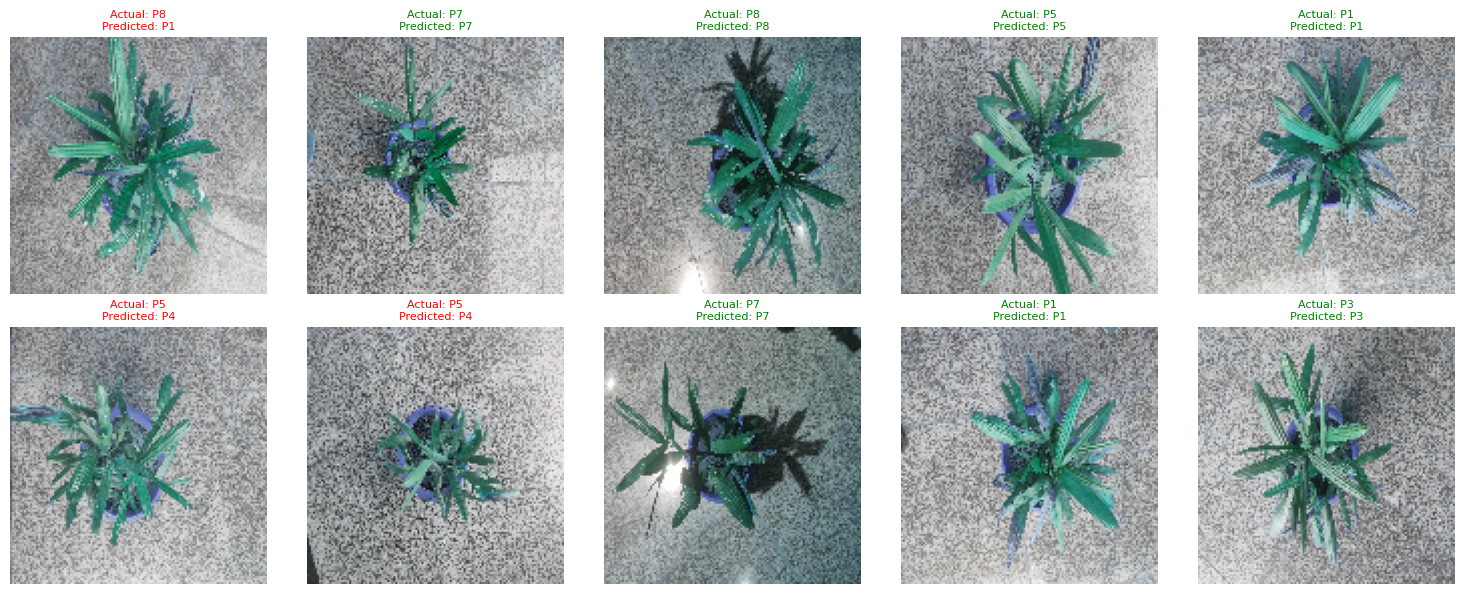

In [48]:
import os
import matplotlib.pyplot as plt
import random

class_names = os.listdir(data_dir)

num_samples = 10  # Number of samples to display
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed

# Get random indices
random_indices = random.sample(range(len(X_test)), num_samples)

# Display images with random indices
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)  # Use separate columns for each image
    plt.imshow(X_test[idx].reshape(128, 128, 3))  # Reshape image to original dimensions
    actual_class_name = class_names[y_test[idx]]
    predicted_class_name = class_names[y_pred[idx]]
    if y_test[idx] == y_pred[idx]:
        title_color = 'green'  # Correct prediction
    else:
        title_color = 'red'  # Incorrect prediction
    plt.title(f"Actual: {actual_class_name}\nPredicted: {predicted_class_name}", fontsize=8, color=title_color)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [80]:
data_dir1 = "/content/drive/MyDrive/AGRI/DATASET/ACPS_DATASET/PlantPersona_dataset/Wheat/RGB"
data_dir2 = "/content/drive/MyDrive/AGRI/DATASET/ACPS_DATASET/PlantPersona_dataset/Wheat/Thermal"
data_dir3 = "/content/drive/MyDrive/AGRI/DATASET/ACPS_DATASET/PlantPersona_dataset/Mustard/RGB"
data_dir4 = "/content/drive/MyDrive/AGRI/DATASET/ACPS_DATASET/PlantPersona_dataset/Mustard/Thermal"


In [81]:
# Load images and labels
images, labels = load_images_from_folder(data_dir1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Create a pipeline with scaling, PCA, and SVM classifier
clf = make_pipeline(StandardScaler(), PCA(n_components=100), SVC(kernel='rbf', C=10, gamma='scale'))

# Train the model
clf.fit(X_train, y_train)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Error: Unable to read image '/content/drive/MyDrive/AGRI/DATASET/ACPS_DATASET/PlantPersona_dataset/Wheat/RGB/P1/._IR_04417.png'. Skipping...
Error: Unable to read image '/content/drive/MyDrive/AGRI/DATASET/ACPS_DATASET/PlantPersona_dataset/Wheat/RGB/P1/._IR_04416.png'. Skipping...
Error: Unable to read image '/content/drive/MyDrive/AGRI/DATASET/ACPS_DATASET/PlantPersona_dataset/Wheat/RGB/P2/._IR_04421.png'. Skipping...
Accuracy: 0.5862068965517241


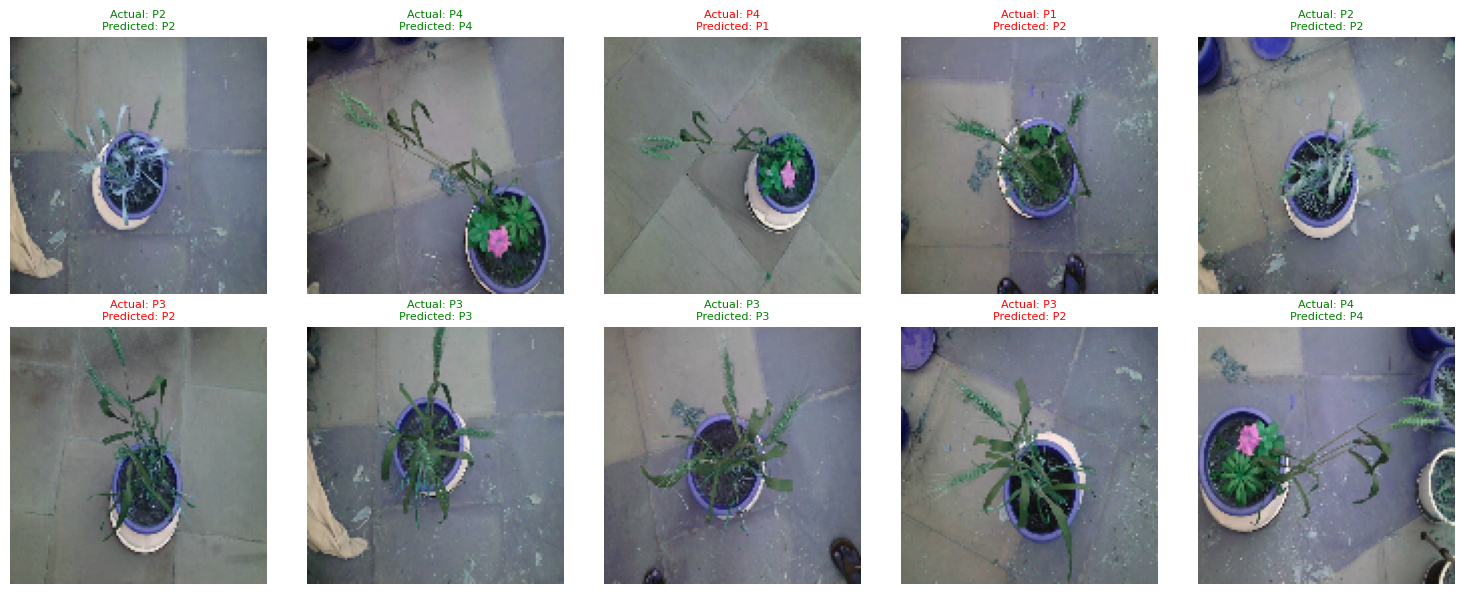

In [82]:
# Display actual labels along with images for 10 random samples
num_samples = 10  # Number of samples to display
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed

# Get random indices
random_indices = random.sample(range(len(X_test)), num_samples)

# Display images with random indices
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)  # Use separate columns for each image
    plt.imshow(X_test[idx].reshape(128, 128, 3))  # Reshape image to original dimensions
    actual_class_name = os.listdir(data_dir)[y_test[idx]]  # Get class name from directory
    predicted_class_name = os.listdir(data_dir)[clf.predict([X_test[idx]])[0]]  # Get predicted class name
    if y_test[idx] == clf.predict([X_test[idx]])[0]:
        title_color = 'green'  # Correct prediction
    else:
        title_color = 'red'  # Incorrect prediction
    plt.title(f"Actual: {actual_class_name}\nPredicted: {predicted_class_name}", fontsize=8, color=title_color)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [83]:
# Load images and labels
images, labels = load_images_from_folder(data_dir2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Create a pipeline with scaling, PCA, and SVM classifier
clf = make_pipeline(StandardScaler(), PCA(n_components=100), SVC(kernel='rbf', C=10, gamma='scale'))

# Train the model
clf.fit(X_train, y_train)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8275862068965517


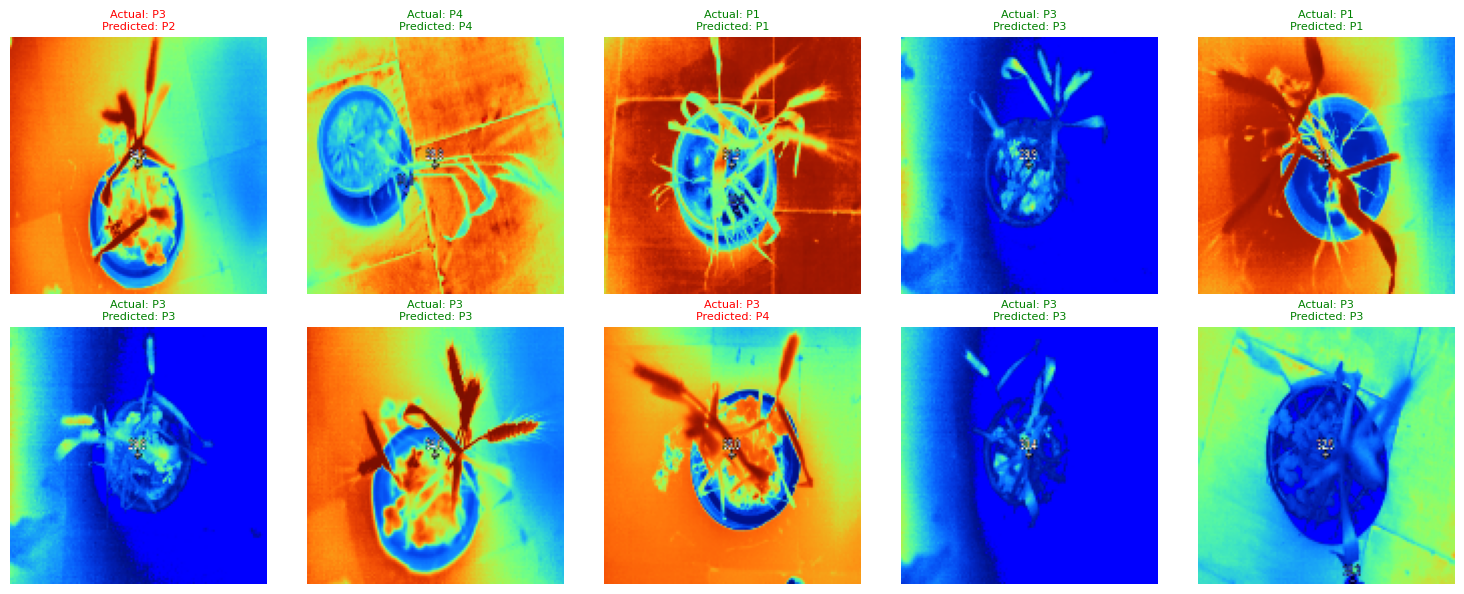

In [84]:
# Display actual labels along with images for 10 random samples
num_samples = 10  # Number of samples to display
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed

# Get random indices
random_indices = random.sample(range(len(X_test)), num_samples)

# Display images with random indices
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)  # Use separate columns for each image
    plt.imshow(X_test[idx].reshape(128, 128, 3))  # Reshape image to original dimensions
    actual_class_name = os.listdir(data_dir)[y_test[idx]]  # Get class name from directory
    predicted_class_name = os.listdir(data_dir)[clf.predict([X_test[idx]])[0]]  # Get predicted class name
    if y_test[idx] == clf.predict([X_test[idx]])[0]:
        title_color = 'green'  # Correct prediction
    else:
        title_color = 'red'  # Incorrect prediction
    plt.title(f"Actual: {actual_class_name}\nPredicted: {predicted_class_name}", fontsize=8, color=title_color)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [85]:
# Load images and labels
images, labels = load_images_from_folder(data_dir3)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Create a pipeline with scaling, PCA, and SVM classifier
clf = make_pipeline(StandardScaler(), PCA(n_components=100), SVC(kernel='rbf', C=10, gamma='scale'))

# Train the model
clf.fit(X_train, y_train)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Error: Unable to read image '/content/drive/MyDrive/AGRI/DATASET/ACPS_DATASET/PlantPersona_dataset/Mustard/RGB/P3/._IR_04446.png'. Skipping...
Error: Unable to read image '/content/drive/MyDrive/AGRI/DATASET/ACPS_DATASET/PlantPersona_dataset/Mustard/RGB/P3/._IR_04447.png'. Skipping...
Error: Unable to read image '/content/drive/MyDrive/AGRI/DATASET/ACPS_DATASET/PlantPersona_dataset/Mustard/RGB/P2/._IR_04445.png'. Skipping...
Error: Unable to read image '/content/drive/MyDrive/AGRI/DATASET/ACPS_DATASET/PlantPersona_dataset/Mustard/RGB/P1/._IR_04669.png'. Skipping...
Error: Unable to read image '/content/drive/MyDrive/AGRI/DATASET/ACPS_DATASET/PlantPersona_dataset/Mustard/RGB/P1/._IR_04668.png'. Skipping...
Error: Unable to read image '/content/drive/MyDrive/AGRI/DATASET/ACPS_DATASET/PlantPersona_dataset/Mustard/RGB/P1/._IR_04663.png'. Skipping...
Error: Unable to read image '/content/drive/MyDrive/AGRI/DATASET/ACPS_DATASET/PlantPersona_dataset/Mustard/RGB/P1/._IR_04670.png'. Skipping...

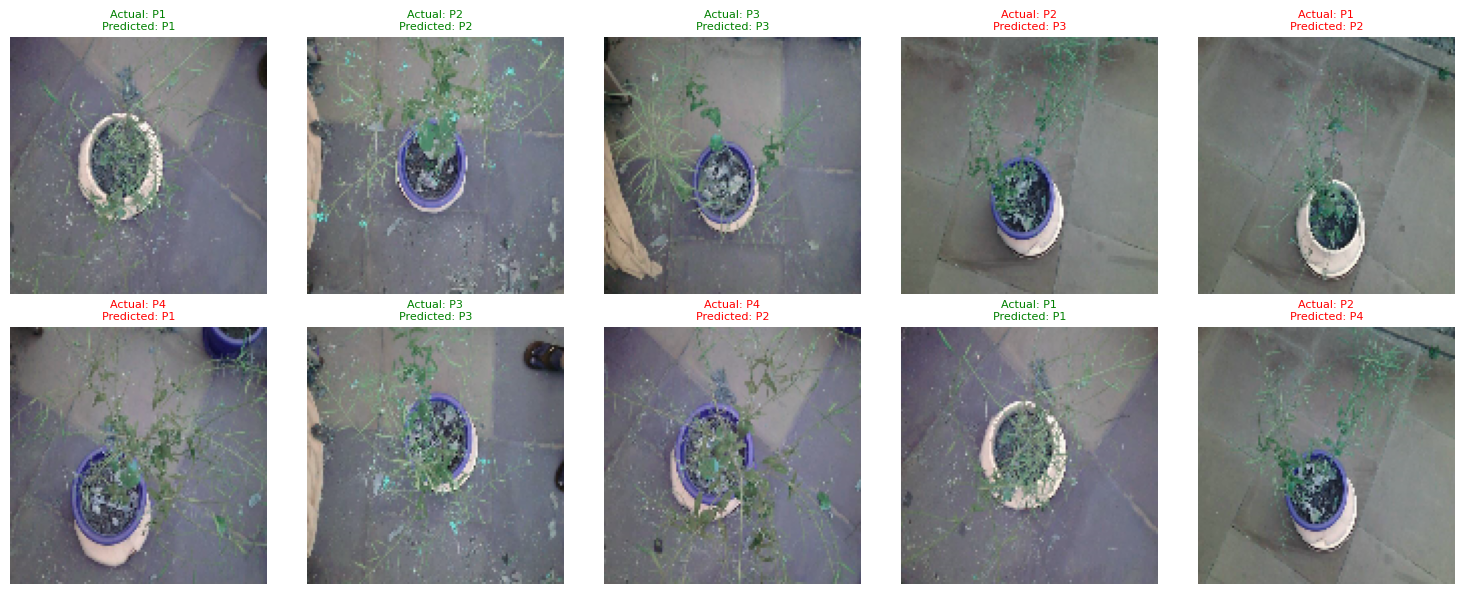

In [86]:
# Display actual labels along with images for 10 random samples
num_samples = 10  # Number of samples to display
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed

# Get random indices
random_indices = random.sample(range(len(X_test)), num_samples)

# Display images with random indices
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)  # Use separate columns for each image
    plt.imshow(X_test[idx].reshape(128, 128, 3))  # Reshape image to original dimensions
    actual_class_name = os.listdir(data_dir)[y_test[idx]]  # Get class name from directory
    predicted_class_name = os.listdir(data_dir)[clf.predict([X_test[idx]])[0]]  # Get predicted class name
    if y_test[idx] == clf.predict([X_test[idx]])[0]:
        title_color = 'green'  # Correct prediction
    else:
        title_color = 'red'  # Incorrect prediction
    plt.title(f"Actual: {actual_class_name}\nPredicted: {predicted_class_name}", fontsize=8, color=title_color)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [87]:
# Load images and labels
images, labels = load_images_from_folder(data_dir4)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Create a pipeline with scaling, PCA, and SVM classifier
clf = make_pipeline(StandardScaler(), PCA(n_components=100), SVC(kernel='rbf', C=10, gamma='scale'))

# Train the model
clf.fit(X_train, y_train)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7241379310344828


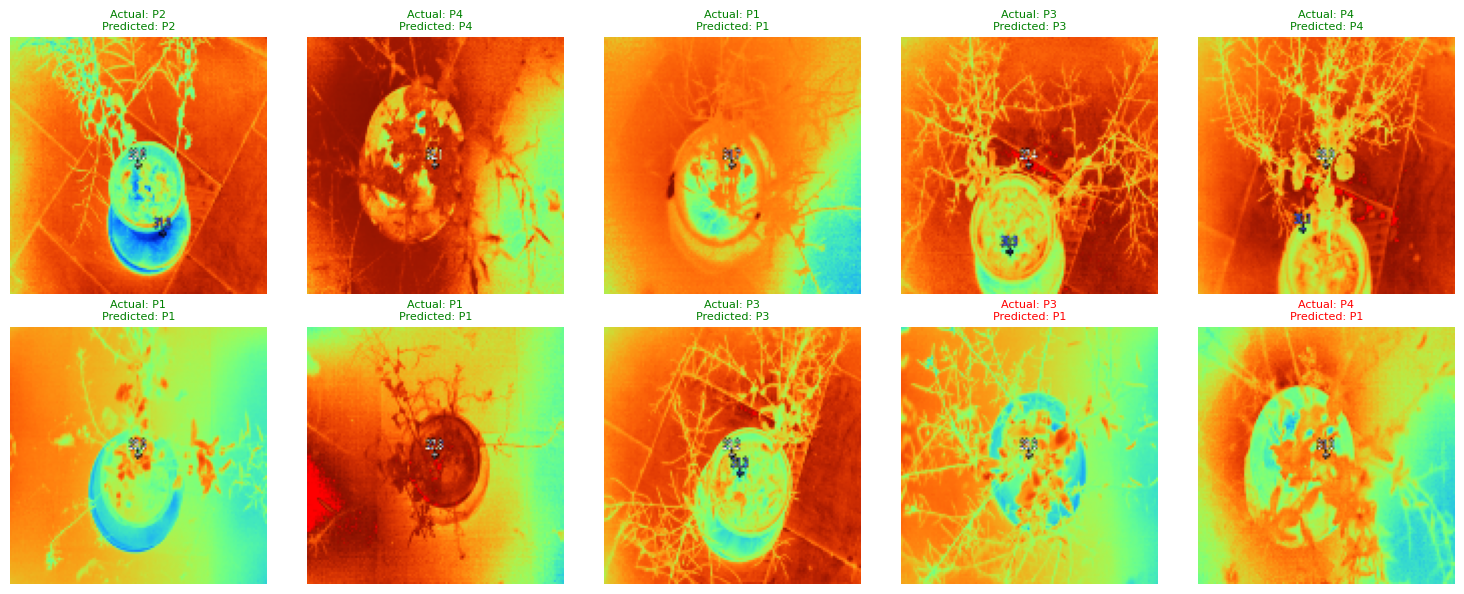

In [88]:
# Display actual labels along with images for 10 random samples
num_samples = 10  # Number of samples to display
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed

# Get random indices
random_indices = random.sample(range(len(X_test)), num_samples)

# Display images with random indices
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)  # Use separate columns for each image
    plt.imshow(X_test[idx].reshape(128, 128, 3))  # Reshape image to original dimensions
    actual_class_name = os.listdir(data_dir)[y_test[idx]]  # Get class name from directory
    predicted_class_name = os.listdir(data_dir)[clf.predict([X_test[idx]])[0]]  # Get predicted class name
    if y_test[idx] == clf.predict([X_test[idx]])[0]:
        title_color = 'green'  # Correct prediction
    else:
        title_color = 'red'  # Incorrect prediction
    plt.title(f"Actual: {actual_class_name}\nPredicted: {predicted_class_name}", fontsize=8, color=title_color)
    plt.axis('off')

plt.tight_layout()
plt.show()